## Градиентный бустинг (Gradient Boosting Machine)

Предсказание ансабля можно представить следующей формулой
$$a_N = \sum_{n=1}^N b_n(x)$$


Или поскольку нам нужна оценка с наличием смещения (его мы скорректируем следующими моделями) и с минимальным разбросом можно взять константное предсказание например среднее значение в задаче регрессии.

После чего у нас останется некоторая ошибка - разница между предсказаниями ансамбля из предыдущих моделей и целевой переменной, а для минимизации этой ошибки с точки зрения произвольной функции потерь будет выглядеть как прогроз градиента ошибки

$$S_i = -\frac{\partial L(y_i, t)}{\partial t} \text{, где } t = a_{N-1}(x_i)$$

Например для **MSE** градиент ошибки для построения 2-й модели найдем следующим образом

$$S_i = -\frac{\partial \frac{1}{2}(y_i - b_1(x_i))^2}{\partial b_1(x_i)}$$

Соответственно после нахождения производной и антиградиента (смена знака), нахождение остатков для MSE сведется к 

$$S_i = y_i - b_1(x_i)$$

А например для классификации для **логистической функции** потерь вида $L(y, t) = log(1 + e^{-yt})$
$$S_i = y_i - \frac{1}{1 + \exp(y_i b_1(x_i))} $$

Следующую модель будем учить прогнозировать остатки после работы предыдующих моделей и так далее до срабатывания критерия останова (ошибка перестает убывать, достигнут предел количества моделей).

При этом все последующие деревья будут иметь глобальный поправочный коэффициент $\mu$ и локальный коэффициент каждого дерева, при этом глобальный коэффициент задается в начале обучения (и зависит от глубины бустинга - количества деревьев) то локальный $\gamma_N$ подбирается, например перебором некоторого количества значений, с точки зрения минимизации функционала

$$argmin\sum_{i=1}^l L(y_i, a_{N-1}(x_i) + \gamma b_N(x_i))$$

**Регуляризация** в деревьях:
* добавление функционала $\lambda (\sum(w^2)) + \alpha \sum|w| + \nu Q$, где w - вектор значений в листьях Q - количество листьев
* обрезка на лету за счет расчета прироста информации с учетом регуляризатора и не добавления разбиения при минимальном / отсутствии прироста.

**Основные гиперпараметры для настройки по уровням**
* num_iterations / n_estimators - количество деревьев
* learning_rate / eta - глобальный весовой коэффициент значимости каждого следующего дерева
*  $\lambda$ $\alpha$ $\nu$ - параметры регуляризации
 * max_depth(4-10) - глубина дерева
 * sub_sample / col_sample_bytree / max_features - доля данных
  * min_ (leaf, samples to split)
  * training speed params
  
**Имплементации GBM**
1) XGBoost
 * построение дерева по уровням
 * производные вторых порядков (в разложении в ряд Тейлора функции потерь)
 * стрижка на лету
 
2) LightGBM (LGBM)
 * построение дерева leaf-wise instead level-wise (необязательно по уровням) -> часто ведет к построению нессиметричных / несбалансированных деревьев
 * разбиение через гистограммы -> не полный перебор а разбиение на корзины, определение лучшей, еще разбиение и т.д.
 * GOSS (Gradient-based-One-Side-Sampling) - сохранение экземпляров с большим значением градиентов и выборок, остальное (10%) рандом -> теряем в качестве приобретаем в скорости -> по умолчанию выключен
 
3) CatBoost
 * Способ построения дерева: по уровням но во всех узлах уровня для разбиения используется один признак и одно значение разбиения -> считаем общий прирост информации -> быстро работаю предсказания за счет разбиения сразу всех объектов по корзинам сверху вниз
 * хороший результат без особого тюнинга параметров
 * хорошая работа с категориальными признаками

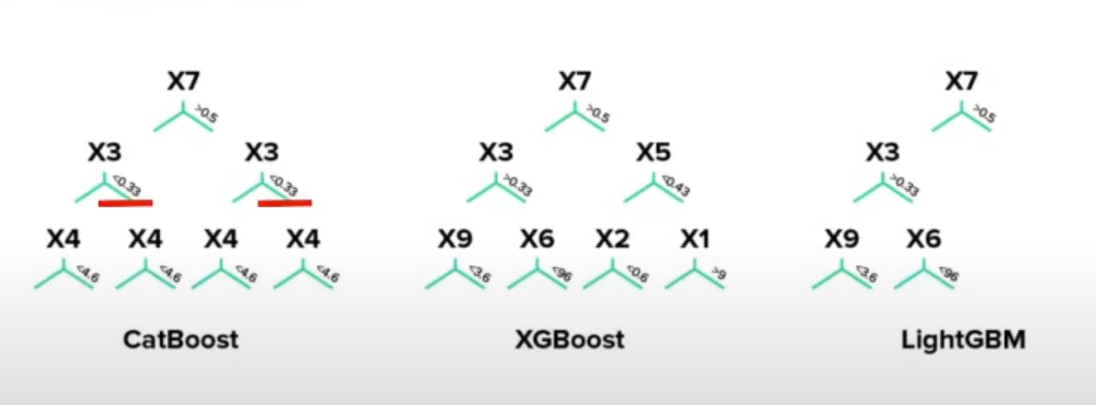

[топовое видео Игоря Котенкова](https://youtu.be/wnTlsXaVj-s)